# LALSimulation
This uses LALSimulation. The reason this has been put on pause as ```XLAL Error - XLALSimIMRSpinAlignedEOBModes: Ringdown frequency > Nyquist frequency!``` is an error that keeps popping up because I'm struggling to actually change the parameter_check() values.

We're using OOP to create a LALCompactBinaryCoalescenseGenerator object: https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/classlalsimulation_1_1gwsignal_1_1core_1_1waveform_1_1_l_a_l_compact_binary_coalescence_generator.html

In [226]:
import lal
import lalsimulation
import lalsimulation.gwsignal.core.waveform as wv
from astropy import units as u

In [263]:
if __name__=='__main__':
    approxs = [lalsimulation.SEOBNRv4, lalsimulation.TaylorT2, lalsimulation.SEOBNRv4_ROM_NRTidalv2_NSBH]
    approx = lalsimulation.SEOBNRv4
    
    parentWV = wv.CompactBinaryCoalescenceGenerator()
    waveform = wv.LALCompactBinaryCoalescenceGenerator(approx)
    waveform.parameter_check(units_sys='S.I.', 
                             mass1=30*u.solMass,
                             mass2=30*u.solMass,
                             deltaT = 0*u.s, 
                             deltaF = 2048*u.Hz)

    prepop['mass1'] = 30*u.solMass
    prepop['mass2'] = 30*u.solMass
    prepop['deltaT'] = 0
    prepop['deltaF'] = 2047*u.Hz
    prepop['distance'] = 100*u.Mpc
    prepop['f_max'] = 2048*u.Hz
    #td = waveform.generate_td_waveform()

In [244]:
def generate_waveform(phiref, deltaT, m1, m2, fmin, dist, incl):
    approx = lalsimulation.SEOBNRv4  # Taylor T2 approximant
    fref = fmin
 
    hp, hc = lalsimulation.SimInspiralChooseTDWaveform(
        m1*lal.MSUN_SI, m2*lal.MSUN_SI, 0., 0., 0., 0., 0., 0., dist*1e6*lal.PC_SI, incl,
        phiref, 0., 0., 0., deltaT, fmin, fref, None, approx)

    # return the frequency domain plus and cross waveforms
    return hp.data.data, hc.data.data

fmin = 20
df = 0.1

m1 = 30
m2 = 30

phiref = 0
iota = 0
dist = 100. # distance in Mpc
deltaT = 1./4096

hp, hc = generate_waveform(phiref, deltaT, m1, m2, fmin, dist, iota)

# PyCBC
For this I tried using PyCBC, with https://pycbc.org/pycbc/latest/html/waveform.html as a reference point.

The most common error I'm receiving is ```XLAL Error - SEOBNRv4ROMCore (LALSimIMRSEOBNRv4ROM.c:772): Error setting up SEOBNRv4ROM data - check your $LAL_DATA_PATH```. Which I'm receiving as an error for LALSimulation as well when I attempt to use SEOBNRv4_ROM_NRTidalv2_NSBH. Besides this, PyCBC seems to be working far better than LALSimulation, and it's also built on using LALSimulation.

In [241]:
!pip install pycbc

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.4 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 40.1 MB/s eta 0:00:01
     |████████████████████████████████| 48.1 MB 46.7 MB/s eta 0:00:01     |█████████████████▋              | 26.5 MB 46.7 MB/s eta 0:00:01
     |████████████████████████████████| 202 kB 36.2 MB/s eta 0:00:01     |█████████████████████████████▏  | 184 kB 36.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 5.2 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 5.6 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pegasus-wms.api: filename=pegasus_wms.api-5.0.7-py3-none-any.whl size=50514 sha256=77afb5f6ba272b7c9

In [277]:
%matplotlib inline
from pycbc.waveform import td_approximants, fd_approximants
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform

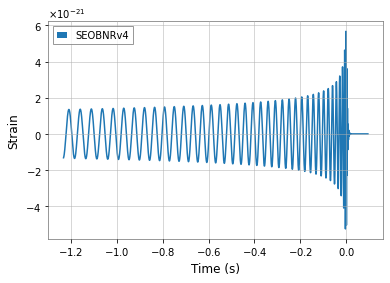

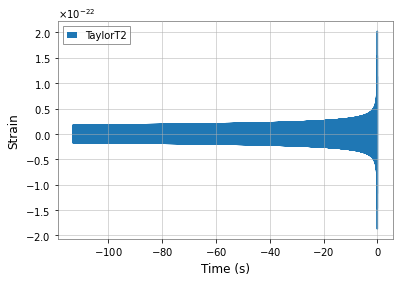

In [290]:
aproxs = ['SEOBNRv4', 'TaylorT2', 'SEOBNRv4_ROM_NRTidalv2_NSBH']
m1 = [30, 1.5, 19.5] #varying masses based on aprox we're using. for i = 3, m1 >= m2
m2 = [20, 2, 1.5]

for i in range(2):
    hp, hc = get_td_waveform(approximant=aproxs[i], mass1=m1[i], mass2=m2[i], delta_t=1.0/4096,
                             f_lower=20, distance=100, f_ref=20, delta_f=1/4, f_final = 2048)
    plt.plot(hp.sample_times, hp, label=aproxs[i])

    plt.ylabel('Strain')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.show()

# Data Whitening

In [296]:
hp, hc = get_td_waveform(approximant=aproxs[0], mass1=m1[0], mass2=m2[0], delta_t=1.0/4096,
                         f_lower=20, distance=100, f_ref=20, delta_f=1/4, f_final = 2048)
print(hp)

[-1.31981063e-21 -1.31120015e-21 -1.30135337e-21 ...
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


# Other Resources
- https://github.com/Chaitany1729/nn_for_gw
- https://github.com/eric-moreno/Anomaly-Detection-Autoencoder
- https://github.com/timothygebhard/ggwd/